# EDA Notebook
by: Halley

## **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fl_pass = pd.read_csv('flights_passengers_agg.csv')
fl_pass

,Unnamed: 0.1,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,...,origin_country_name,dest_city_market_id,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,distance_group,class,data_source
0,0,0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,...,United States,30693,US,United States,6,614,1,2,F,DU
1,1,0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,...,United States,30693,US,United States,6,612,1,2,F,DU
2,2,1,2019-10-10,UA,UA,UA,206,UA,N68811,206,...,United States,31454,US,United States,6,634,1,3,F,DU
3,3,1,2019-10-10,UA,UA,UA,206,UA,N68811,206,...,United States,31454,US,United States,6,694,1,3,F,DU
4,4,1,2019-10-10,UA,UA,UA,206,UA,N68811,206,...,United States,31454,US,United States,6,722,1,3,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57884,57884,9999,2018-04-21,WN,WN,WN,4510,WN,N945WN,4510,...,United States,32575,US,United States,6,626,2,1,G,DU
57885,57885,9999,2018-04-21,WN,WN,WN,4510,WN,N945WN,4510,...,United States,32575,US,United States,6,673,1,1,F,DU
57886,57886,9999,2018-04-21,WN,WN,WN,4510,WN,N945WN,4510,...,United States,32575,US,United States,6,673,1,1,F,DU
57887,57887,9999,2018-04-21,WN,WN,WN,4510,WN,N945WN,4510,...,United States,32575,US,United States,6,698,1,1,F,DU


In [8]:
fl_pass.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace= True)

In [9]:
fl_pass = fl_pass[['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num','op_unique_carrier','tail_num', 'op_carrier_fl_num', 'distance', 'arr_delay', 'passengers']]

In [10]:
fl_pass.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,distance,arr_delay,passengers
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,822.0,-2.0,1452.0
1,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,822.0,-2.0,6524.0
2,2019-10-10,UA,UA,UA,206,UA,N68811,206,1005.0,-9.0,167.0
3,2019-10-10,UA,UA,UA,206,UA,N68811,206,1005.0,-9.0,267.0
4,2019-10-10,UA,UA,UA,206,UA,N68811,206,1005.0,-9.0,525.0


In [84]:
fl_pass.rename(columns = {'mkt_unique_carrier':'unique_carrier'}, inplace = True)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_8616\4105045045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_pass.rename(columns = {'mkt_unique_carrier':'unique_carrier'}, inplace = True)


In [ ]:
#should check for NAN in delays

### Average monthly delay per air carrier (monthly delay is sum of all delays in 1 month) &  distance covered monthly by different air carriers

In [33]:
import datetime as dt

In [35]:
fl_pass['fl_date'] = pd.to_datetime(fl_pass['fl_date'])

C:\Users\3_hal\AppData\Local\Temp\ipykernel_8616\3177659502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_pass['fl_date'] = pd.to_datetime(fl_pass['fl_date'])


In [36]:
fl_pass['month'] = fl_pass['fl_date'].dt.month

C:\Users\3_hal\AppData\Local\Temp\ipykernel_8616\190056901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_pass['month'] = fl_pass['fl_date'].dt.month


In [37]:
fl_pass

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,distance,arr_delay,passengers,month
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,822.0,-2.0,1452.0,7
1,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,822.0,-2.0,6524.0,7
2,2019-10-10,UA,UA,UA,206,UA,N68811,206,1005.0,-9.0,167.0,10
3,2019-10-10,UA,UA,UA,206,UA,N68811,206,1005.0,-9.0,267.0,10
4,2019-10-10,UA,UA,UA,206,UA,N68811,206,1005.0,-9.0,525.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
57884,2018-04-21,WN,WN,WN,4510,WN,N945WN,4510,337.0,3.0,0.0,4
57885,2018-04-21,WN,WN,WN,4510,WN,N945WN,4510,337.0,3.0,3173.0,4
57886,2018-04-21,WN,WN,WN,4510,WN,N945WN,4510,337.0,3.0,3671.0,4
57887,2018-04-21,WN,WN,WN,4510,WN,N945WN,4510,337.0,3.0,7301.0,4


In [86]:
fl_pass[['unique_carrier', 'month', 'arr_delay', 'distance']].groupby(by = ['unique_carrier', 'month']).sum()

arr_delay  distance
unique_carrier month                     
AA             1         6242.0  966659.0
               2        11387.0  603951.0
               3        -1860.0  776022.0
               4         6484.0  751450.0
               5        10321.0  762777.0
...                         ...       ...
WN             8         4822.0  568767.0
               9         1645.0  434198.0
               10        3267.0  550512.0
               11        2182.0  555976.0
               12       -1737.0  528274.0

[123 rows x 2 columns]

In [87]:
#use this to kick-off the agg_df
agg_df = fl_pass[['unique_carrier', 'month', 'arr_delay', 'distance']].groupby(by = ['unique_carrier', 'month']).sum()

### number of passengers that were carried by different air carriers

In [57]:
passengers = pd.read_csv('data/passengers_10000.csv')
passengers.drop(['Unnamed: 0'], axis = 1, inplace= True)
passengers.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [60]:
passengers[['passengers', 'unique_carrier','month']].groupby(by = ['unique_carrier', 'month']).sum()

passengers
unique_carrier month            
04Q            2            12.0
               5             7.0
               6           513.0
               7            37.0
               8            70.0
...                          ...
ZX             5           692.0
               6          7362.0
               8          4288.0
               11         3085.0
               12          797.0

[1492 rows x 1 columns]

### total fuel comsumption per air carrier

In [11]:
fuel = pd.read_csv('data/fuel_consumption_5000.csv')
fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016


In [46]:
fuel.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

* total_gallons: Grand Total - Fuel Consumption (Gallons)
* total_cost: Grand Total - Fuel Cost (Dollars)

In [48]:
fuel[['unique_carrier', 'month', 'total_gallons']].groupby(by = ['unique_carrier', 'month']).sum()

total_gallons
unique_carrier month               
09Q            1          3055241.0
               2          3504322.0
               3          5150056.0
               4          2950101.0
               5          3072049.0
...                             ...
ZW             8         13492766.0
               9          6661501.0
               10         6824293.0
               11         6396823.0
               12         6624974.0

[726 rows x 1 columns]

### average fuel comsumption per passenger per km.
Is this higher for the airlines with bigger average delays?

In [66]:
passeng = passengers[['passengers', 'unique_carrier','month']].groupby(by = ['unique_carrier', 'month']).sum()
fuel_con = fuel[['unique_carrier', 'month', 'total_gallons']].groupby(by = ['unique_carrier', 'month']).sum()

In [88]:
agg_df

arr_delay  distance
unique_carrier month                     
AA             1         6242.0  966659.0
               2        11387.0  603951.0
               3        -1860.0  776022.0
               4         6484.0  751450.0
               5        10321.0  762777.0
...                         ...       ...
WN             8         4822.0  568767.0
               9         1645.0  434198.0
               10        3267.0  550512.0
               11        2182.0  555976.0
               12       -1737.0  528274.0

[123 rows x 2 columns]

In [91]:
agg_df = pd.merge(agg_df,passeng, on=['unique_carrier', 'month'])

In [93]:
agg_df = pd.merge(agg_df,fuel_con, on=['unique_carrier', 'month'])

In [94]:
agg_df

arr_delay  distance  passengers  total_gallons
unique_carrier month                                                
AA             1         6242.0  966659.0    166174.0   1.334803e+09
               2        11387.0  603951.0    214111.0   1.222041e+09
               3        -1860.0  776022.0    122929.0   1.411525e+09
               4         6484.0  751450.0    215683.0   1.378073e+09
               5        10321.0  762777.0    298919.0   1.481394e+09
...                         ...       ...         ...            ...
WN             8         4822.0  568767.0    331760.0   8.722497e+08
               9         1645.0  434198.0    216125.0   7.922542e+08
               10        3267.0  550512.0    336046.0   6.657806e+08
               11        2182.0  555976.0    294683.0   6.638856e+08
               12       -1737.0  528274.0    339672.0   6.800387e+08

[122 rows x 4 columns]

In [95]:
# convert miles to km

agg_df['distance'] = agg_df['distance'] * 1.60934

In [96]:
agg_df

arr_delay      distance  passengers  total_gallons
unique_carrier month                                                    
AA             1         6242.0  1.555683e+06    166174.0   1.334803e+09
               2        11387.0  9.719625e+05    214111.0   1.222041e+09
               3        -1860.0  1.248883e+06    122929.0   1.411525e+09
               4         6484.0  1.209339e+06    215683.0   1.378073e+09
               5        10321.0  1.227568e+06    298919.0   1.481394e+09
...                         ...           ...         ...            ...
WN             8         4822.0  9.153395e+05    331760.0   8.722497e+08
               9         1645.0  6.987722e+05    216125.0   7.922542e+08
               10        3267.0  8.859610e+05    336046.0   6.657806e+08
               11        2182.0  8.947544e+05    294683.0   6.638856e+08
               12       -1737.0  8.501725e+05    339672.0   6.800387e+08

[122 rows x 4 columns]

In [99]:
#calc avg fuel consump/pass/km

agg_df['avg_fuel/pass/km'] = agg_df['total_gallons']/agg_df['passengers']/agg_df['distance']

In [100]:
agg_df.head()

arr_delay      distance  passengers  total_gallons  \
unique_carrier month                                                       
AA             1         6242.0  1.555683e+06    166174.0   1.334803e+09   
               2        11387.0  9.719625e+05    214111.0   1.222041e+09   
               3        -1860.0  1.248883e+06    122929.0   1.411525e+09   
               4         6484.0  1.209339e+06    215683.0   1.378073e+09   
               5        10321.0  1.227568e+06    298919.0   1.481394e+09   

                      avg_fuel/pass/km  
unique_carrier month                    
AA             1              0.005163  
               2              0.005872  
               3              0.009194  
               4              0.005283  
               5              0.004037

In [ ]:
#Do bigger delays lead to bigger fuel comsumption per passenger?

<AxesSubplot:xlabel='arr_delay', ylabel='avg_fuel/pass/km'>

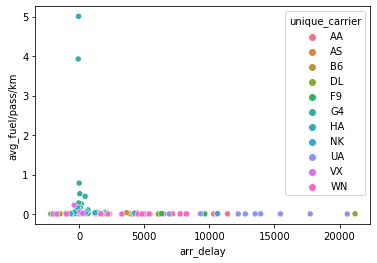

In [103]:
import seaborn as sns
sns.scatterplot(data=agg_df, x="arr_delay", y="avg_fuel/pass/km", hue = 'unique_carrier')

In [109]:
#remove these two outliers
agg_clean = agg_df.sort_values(by = 'avg_fuel/pass/km', ascending = False).iloc[2:]

<AxesSubplot:xlabel='arr_delay', ylabel='avg_fuel/pass/km'>

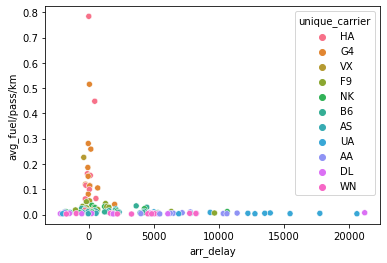

In [110]:
sns.scatterplot(data=agg_clean, x="arr_delay", y="avg_fuel/pass/km", hue = 'unique_carrier')